Loss in epoch-010:2.17e-02
Loss in epoch-020:1.24e-02
Loss in epoch-030:1.02e-02
Loss in epoch-040:4.11e-03
Loss in epoch-050:3.87e-04
Loss in epoch-060:1.18e-04
Loss in epoch-070:2.36e-03
Loss in epoch-080:3.05e-03
Loss in epoch-090:2.98e-03
Loss in epoch-100:2.55e-03


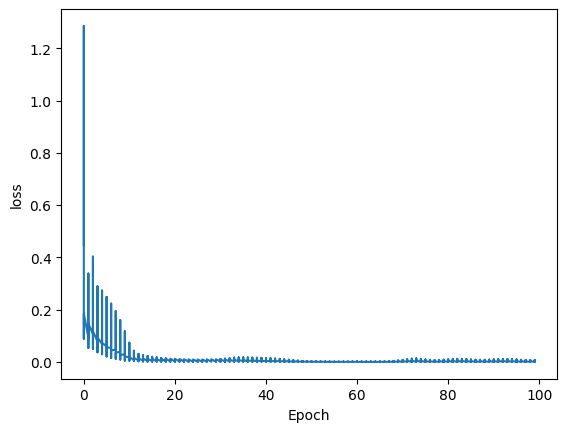

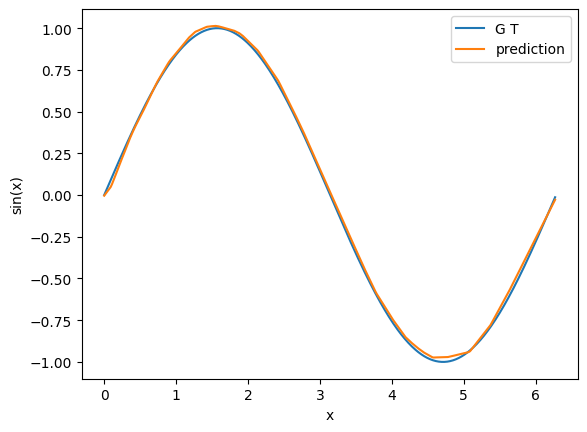

In [10]:
# necessary packages for this homework, you are free to import more.
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import nn
from torch import functional as F
from torchvision import transforms
import pytorch_lightning as pl
# def one_optimize_step(x,gt,optimization,model,cartesian):
#     y_pred=model(x)
#     loss=cartesian(y_pred,gt)
#     optimization.zero_grad()
#     loss.backward()
#     optimizer.step()
#     return loss
linmodel=nn.Sequential(
    nn.Linear(1,1024),
    nn.ReLU(),
    nn.Linear(1024,1)
)#还需要再初始化一次吗

class Litlinear(pl.LightningModule):
    def __init__(self,linmodel):
        super().__init__()
        self.model=linmodel
    def training_step(self,batch):
        x,y=batch
        x=x.view(x.size(0),-1)
        x_hat=self.model(x)
        loss=nn.functional.mse_loss(x_hat,x)
        self.log("train_loss",loss)
        return loss

    def configure_optimizers(self):
        optimizer=torch.optim.Adam(self.parameters,lr=1e-3)
        return optimizer

model=Litlinear(linmodel)

x=np.arange(0,6.28,0.01).reshape(-1,1) #reshape操作是为了得到多个数据 能够进行batch操作
y=np.sin(x) #其shape和x保持一致




trainer=pl.Trainer(limit_train_batches=4,max_epochs=5)
trainer.fit(model=model,)

x_plt=x
y_plt=y
NUM_DATA=x.shape[0]
#shuffle the data
shuffle_indx=np.arange(0,NUM_DATA)
np.random.shuffle(shuffle_indx) #没有返回值
x=torch.tensor(x[shuffle_indx],dtype=torch.float32)
y=torch.tensor(y[shuffle_indx],dtype=torch.float32)

Epoch=100
Batch=20
LOG_STEP=10
epoch_list=[]
loss_list=[]

for epoch in range(Epoch):
    for start_indx in range(0,NUM_DATA,Batch):
        x_batch=x[start_indx : start_indx + Batch]
        y_batch=y[start_indx : start_indx + Batch]
        
        loss=one_optimize_step(x_batch,y_batch,optimizer,model,criterion)

        loss_val=loss.item()
        loss_list.append(loss_val)
        epoch_list.append(epoch)

    if (epoch+1)%LOG_STEP==0 or epoch==Epoch-1:
        print(
            f"Loss in epoch-{epoch+1:#0{len(str(NUM_DATA))}d}:{loss_val:.2e}"
        )

plt.figure()
plt.plot(epoch_list,loss_list)
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

#test model
y_pred = model(torch.tensor(x_plt,dtype=torch.float32)).detach().numpy()
plt.figure()
plt.plot(x_plt,y_plt,label='G T')
plt.plot(x_plt,y_pred,label='prediction')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.show()

plt.close('all')